In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
andrewmvd_dog_and_cat_detection_path = kagglehub.dataset_download('andrewmvd/dog-and-cat-detection')

print('Data source import complete.')


In [ ]:
# @title **Pineline project Multi Object Detection**

#flowchart LR
#     %% Style Definitions
#     classDef default fill:#f9f9f9,stroke:#333,stroke-width:1px
#     classDef highlight fill:#e1f5fe,stroke:#01579b,stroke-width:2px
#     classDef process fill:#f3e5f5,stroke:#4a148c,stroke-width:1px

#     %% Main Pipeline
#     A[("🔄 Data Pipeline")] --> B["📊 Dataset"]
#     B --> C["🧠 Model"]
#     C --> D["⚙️ Training"]
#     D --> E["📈 Eval"]

#     %% Dataset Processing
#     subgraph dataset["Dataset Processing"]
#         direction TB
#         B1["MyDataset"] --> B2["DataLoader"]
#         B2 --> B3["Transforms"]

#         subgraph data_config[" "]
#             direction LR
#             BC1["Batch: 64"]
#             BC2["Workers: 4"]
#             BC3["Size: 224×224"]
#         end
#     end

#     %% Model Architecture
#     subgraph model["Model Architecture"]
#         direction TB
#         C1["SimpleYOLO"] --> C2["ResNet50"]
#         C2 --> C3["YOLO Head"]

#         subgraph yolo[" "]
#             direction LR
#             Y1["Grid: 2×2"]
#             Y2["Out: B×2×2×6"]
#         end
#     end

#     %% Training Pipeline
#     subgraph train["Training Pipeline"]
#         direction TB
#         T1["Loss Calc"] --> T2["IoU"]
#         T2 --> T3["Evaluate"]

#         subgraph train_params[" "]
#             direction LR
#             TP1["Epochs: 100"]
#             TP2["LR: 2e-3"]
#         end
#     end

#     %% Evaluation
#     subgraph eval["Evaluation"]
#         direction TB
#         E1["mAP"] --> E2["Visualize"]
#         E2 --> E3["Predict"]
#     end

#     %% Connections
#     B --> dataset
#     C --> model
#     D --> train
#     E --> eval

# flowchart TD
#     %% Main Pipeline
#     A[Tải Dữ Liệu & Import Thư Viện] --> B[Dataset Processing]
#     B --> C[Model Architecture]
#     C --> D[Training Pipeline]
#     D --> E[Evaluation & Visualization]

#     %% Dataset Processing Details
#     subgraph dataset[Dataset Processing]
#         direction LR
#         B1[MyDataset Class] --> B2[Load Data]
#         B2 --> B3[Transform Images]
#         B3 --> B4[Process Annotations]

#         subgraph transforms[Transforms]
#             direction TB
#             T1[Resize 224x224]
#             T2[ToTensor]
#             T3[Normalize]
#             T4["mean=[0.485, 0.456, 0.406]"]
#             T5["std=[0.229, 0.224, 0.225]"]
#         end

#         subgraph dataloader[DataLoader]
#             direction TB
#             D1["batch_size=64"]
#             D2["num_workers=4"]
#             D3["pin_memory=True"]
#             D4["persistent_workers=True"]
#         end
#     end

#     %% Model Architecture Details
#     subgraph model[Model Architecture]
#         direction LR
#         C1[SimpleYOLO] --> C2[Forward Pass]
#         C2 --> C3[Output Shape]

#         subgraph yolo[YOLO Details]
#             direction TB
#             Y1["Input: BxCxHxW"]
#             Y2["Grid: 2x2"]
#             Y3["Output: Bx2x2x(4+num_classes)"]
#             Y4["4: bbox coordinates"]
#             Y5["num_classes: 2 (dog/cat)"]
#         end
#     end

#     %% Training Pipeline Details
#     subgraph training[Training Pipeline]
#         direction LR
#         TR1[calculate_loss] --> TR2[calculate_iou]
#         TR2 --> TR3[evaluate_model]
#         TR3 --> TR4[train_model]

#         subgraph loss[Loss Components]
#             direction TB
#             L1[Classification Loss]
#             L2[Regression Loss]
#             L3[No Object Loss]
#         end

#         subgraph train_loop[Training Loop]
#             direction TB
#             TL1[Forward Pass]
#             TL2[Calculate Loss]
#             TL3[Backpropagation]
#             TL4[Optimizer Step]
#             TL5[Validation]
#             TL6[Save Best Model]

#             TL1 --> TL2 --> TL3 --> TL4 --> TL5 --> TL6
#         end
#     end

#     %% Evaluation & Visualization
#     subgraph eval[Evaluation & Visualization]
#         direction LR
#         E1[evaluate_model] --> E2[MeanAveragePrecision]
#         E2 --> E3[visualize_data_samples]
#         E3 --> E4[visualize_predictions]

#         subgraph metrics[Metrics]
#             direction TB
#             M1[Validation Loss]
#             M2[mAP]
#             M3[IoU]
#         end

#         subgraph viz[Visualization]
#             direction TB
#             V1[Ground Truth Boxes]
#             V2[Predicted Boxes]
#             V3[Class Labels]
#             V4[Confidence Scores]
#         end
#     end

#     %% Hyperparameters
#     subgraph hyper[Hyperparameters]
#         direction TB
#         H1["num_epochs=100"]
#         H2["learning_rate=2e-3"]
#         H3["batch_size=64"]
#         H4["num_classes=2"]
#     end

#     %% Connect Components
#     B --> dataset
#     C --> model
#     D --> training
#     E --> eval
#     training --> hyper


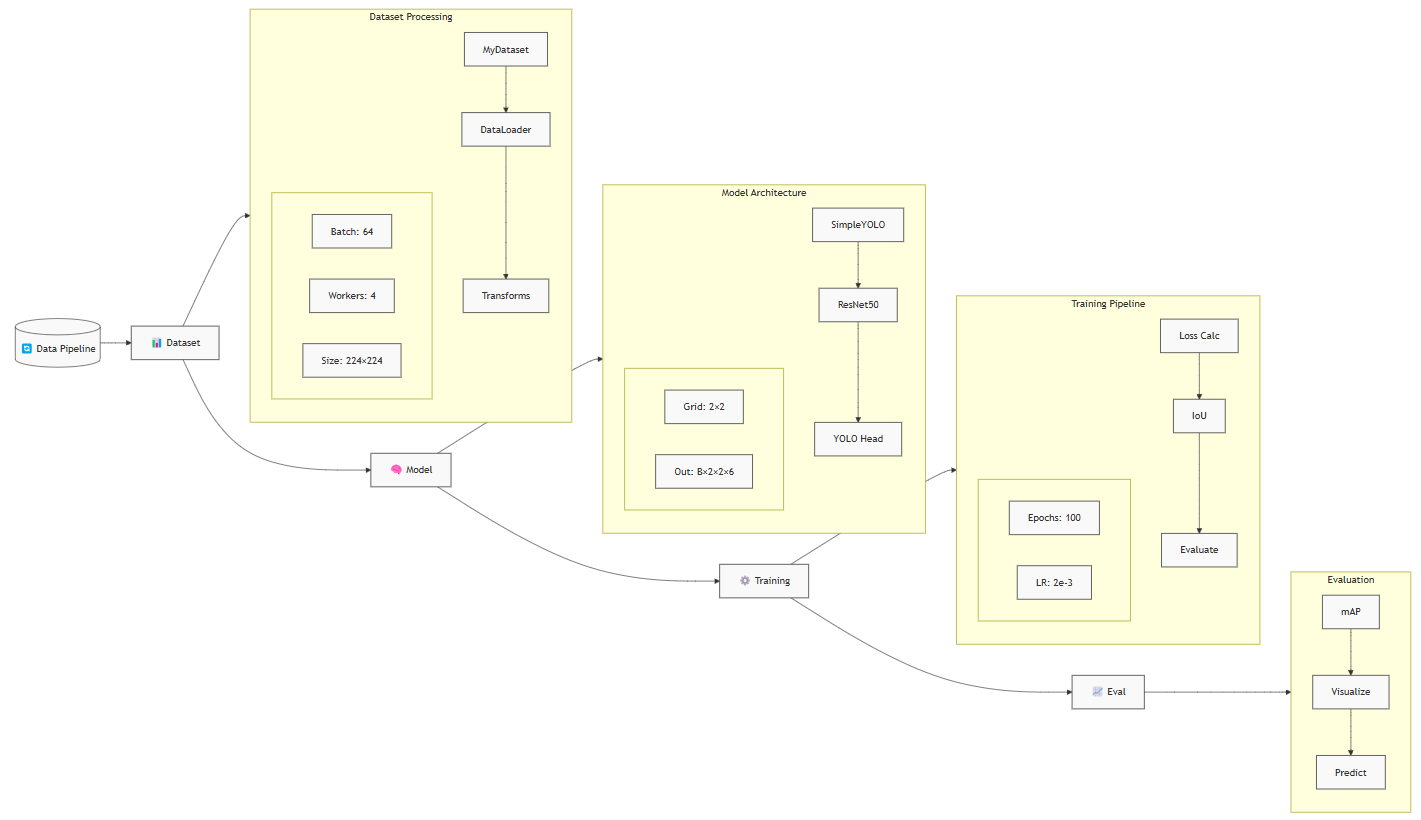

**Pineline chi tiết để triển khai**

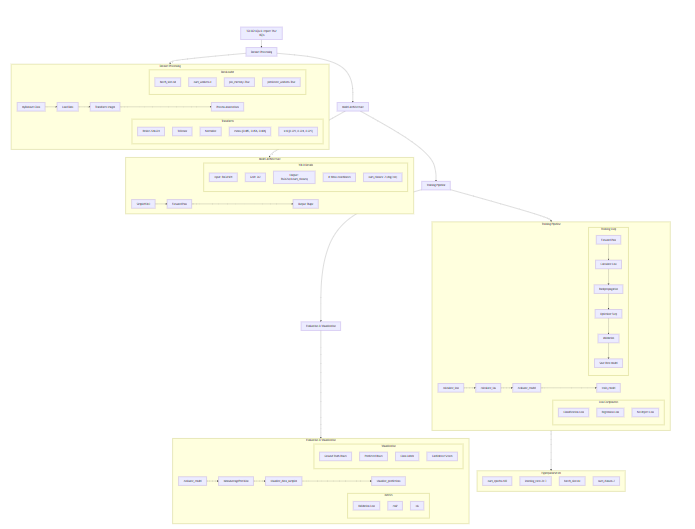

In [ ]:
#@title **1. Loadata**
import kagglehub

# Download latest version
data_dir = kagglehub.dataset_download("andrewmvd/dog-and-cat-detection")

print("Path to dataset files:", data_dir)

Path to dataset files: /kaggle/input/dog-and-cat-detection


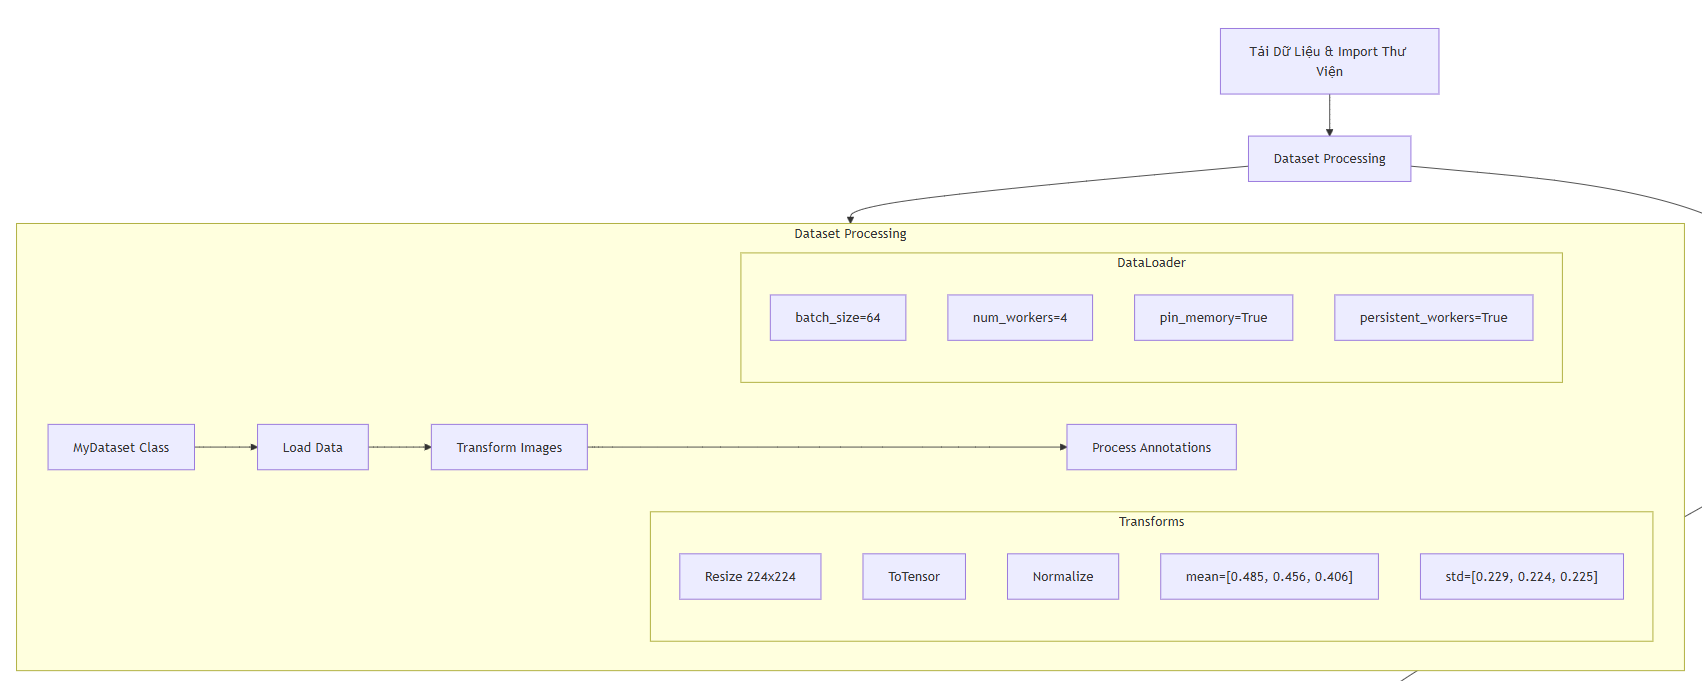

In [ ]:
#@title **2. Setting và cài đặt thư viện **
%pip install torchmetrics --quiet # Cài đặt thư viện torchmetrics để tính toán các metrics đánh giá mô hình.
%pip install pycocotools --quiet  # Cài đặt thư viện pycocotools để làm việc với định dạng dữ liệu COCO.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import random
import xml.etree.ElementTree as ET

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tqdm.notebook as tqdm
from PIL import Image
from torch.utils.data import DataLoader, Dataset, Subset
from torchmetrics.detection.mean_ap import MeanAveragePrecision
from torchvision import models, transforms
from torchvision.models.resnet import ResNet50_Weights

# Set the random seed for reproducibility.
seed = 123
torch.manual_seed(seed)

In [ ]:
class PascalVOC_Dataset(Dataset):
    def __init__(self, annotations_dir, image_dir, transform=None):
        self.annotations_dir = annotations_dir
        self.image_dir = image_dir
        self.transform = transform

        # list[hình ảnh chỉ có 'một obj'(mèo hoặc chó)]
        self.image_files = self.filter_images_with_multiple_objects()

    def filter_images_with_multiple_objects(self):
        """ Lọc hình ảnh -> list[hình ảnh chỉ có 'một obj'(mèo hoặc chó)]"""
        valid_image_files = []
        for f in os.listdir(self.image_dir):
            if os.path.isfile(os.path.join(self.image_dir, f)):
                img_name = f
                annotation_name = os.path.splitext(img_name)[0] + ".xml"
                annotation_path = os.path.join(self.annotations_dir, annotation_name)

                if self.count_objects_in_annotation(annotation_path) == 1:
                    valid_image_files.append(img_name)
        return valid_image_files

    def count_objects_in_annotation(self, annotation_path):
        """ input annotation_path -> return count số lượng obj được chú thích trong tệp """
        try:
            tree = ET.parse(annotation_path)
            root = tree.getroot()
            count = 0
            for obj in root.findall("object"):
                count += 1
            return count
        except FileNotFoundError:
            return 0

    def parse_annotation(self, annotation_path):
        # annotation_path -->>  label_num , bbox[x, y, w, h]

        tree = ET.parse(annotation_path)
        root = tree.getroot()

        # Get image size for normalization
        image_width = int(root.find("size/width").text)
        image_height = int(root.find("size/height").text)

        label = None
        bbox = None
        for obj in root.findall("object"):
            name = obj.find("name").text

            # Khi chưa có obj nào thì điều kiện mới xảy ra
            if label is None:  # Take the first label
                label = name
                # Get bounding box coordinates
                xmin = int(obj.find("bndbox/xmin").text)
                ymin = int(obj.find("bndbox/ymin").text)
                xmax = int(obj.find("bndbox/xmax").text)
                ymax = int(obj.find("bndbox/ymax").text)

                # Normalize bbox coordinates to [0, 1]
                bbox = [
                    xmin / image_width,
                    ymin / image_height,
                    xmax / image_width,
                    ymax / image_height,
                ]
                break

        # Convert label to numerical representation (0 for cat, 1 for dog)
        label_num = 0 if label == "cat" else 1 if label == "dog" else -1

        return label_num, torch.tensor(bbox, dtype=torch.float32)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img1_file = self.image_files[idx]
        img1_path = os.path.join(self.image_dir, img1_file)

        annotation_name = os.path.splitext(img1_file)[0] + ".xml"
        img1_annotations = self.parse_annotation(
            os.path.join(self.annotations_dir, annotation_name)
        )

        if idx == len(self.image_files) - 1:
            idx2 = 0
        else:
            idx2 = idx + 1
        img2_file = self.image_files[idx2]
        img2_path = os.path.join(self.image_dir, img2_file)

        annotation_name = os.path.splitext(img2_file)[0] + ".xml"
        img2_annotations = self.parse_annotation(
            os.path.join(self.annotations_dir, annotation_name)
        )

        img1 = Image.open(img1_path).convert("RGB")
        img2 = Image.open(img2_path).convert("RGB")

        # Horizontal merge
        merged_image = Image.new(
            "RGB", (img1.width + img2.width, max(img1.height, img2.height))
        )
        merged_image.paste(img1, (0, 0))
        merged_image.paste(img2, (img1.width, 0))
        merged_w = img1.width + img2.width
        merged_h = max(img1.height, img2.height)

        merged_annotations = []

        # Adjust bbox coordinates for objects from img1 AND normalize
        new_bbox1 = [
            img1_annotations[1][0] * img1.width / merged_w,  # Normalize xmin
            img1_annotations[1][1] * img1.height / merged_h,  # Normalize ymin
            img1_annotations[1][2] * img1.width / merged_w,  # Normalize xmax
            img1_annotations[1][3] * img1.height / merged_h,  # Normalize ymax
        ]
        merged_annotations.append({"bbox": new_bbox1, "label": img1_annotations[0]})

        # Adjust bbox coordinates for objects from img2 AND normalize
        new_bbox2 = [
            (img2_annotations[1][0] * img2.width + img1.width)
            / merged_w,  # Normalize xmin
            img2_annotations[1][1] * img2.height / merged_h,  # Normalize ymin
            (img2_annotations[1][2] * img2.width + img1.width)
            / merged_w,  # Normalize xmax
            img2_annotations[1][3] * img2.height / merged_h,  # Normalize ymax
        ]

        merged_annotations.append({"bbox": new_bbox2, "label": img2_annotations[0]})

        # Convert merged image to tensor
        if self.transform:
            merged_image = self.transform(merged_image)
        else:
            merged_image = transforms.ToTensor()(merged_image)

        # Convert annotations to 1D tensors, with shape (4,) for bbox and (1,) for label
        annotations = torch.zeros((len(merged_annotations), 5))
        for i, ann in enumerate(merged_annotations):
            annotations[i] = torch.cat(
                (torch.tensor(ann["bbox"]), torch.tensor([ann["label"]]))
            )

        #---------------Logic tư duy ---------------------------------#
        # merged_annotations = list[{"bbox": , "label":},{"bbox": , "label":}]  .Size: (0, 5)
        # annotation         = torch.cat((torch.tensor(ann["bbox"]), torch.tensor([ann["label"]]) # nối các tensor trong PyTorch
        # annotations        = list[torch.tensor(bbox_x, bbox_y, bbox_width, bbox_height, label), torch.tensor(bbox_x, bbox_y, bbox_width, bbox_height, label)] # nối các tensor trong PyTorch

        return merged_image, annotations


In [ ]:
# Define paths
annotations_dir = os.path.join(data_dir, "annotations")
image_dir = os.path.join(data_dir, "images")

# Define transformations
transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

# First create two base datasets with different transforms
base_dataset = PascalVOC_Dataset(annotations_dir, image_dir, transform=transform)

# Get the total dataset size
dataset_size = len(base_dataset)

# Calculate train and validation sizes
val_size = int(0.2 * dataset_size)
train_size = dataset_size - val_size

# Generate indices
indices = np.arange(dataset_size)
np.random.seed(42)  # Ensure reproducibility
np.random.shuffle(indices)

# Split indices for train and validation sets
train_indices, val_indices = indices[:train_size], indices[train_size:]
# train_indices, val_indices = indices[:1], indices[:1]

# Create Subsets using the appropriate base dataset
train_dataset = Subset(base_dataset, train_indices)
val_dataset = Subset(base_dataset, val_indices)

# Create DataLoaders
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    pin_memory=True, #  tăng tốc độ truyền dữ liệu từ CPU sang GPU.
    num_workers=4,
    persistent_workers=True, #  True, workers giữ lại giữa các epoch, tiết kiệm thời gian khởi tạo workers
    drop_last=True, #  mẫu dữ liệu còn lại trong epoch cuối cùng không đủ để tạo thành một batch đầy đủ, drop_last=True sẽ bỏ qua batch này. Điều này đảm bảo kích thước batch luôn nhất quán.
)
val_loader = DataLoader(
    val_dataset,
    batch_size=64,
    shuffle=False,
    pin_memory=True,
    num_workers=4,
    persistent_workers=True,
    drop_last=False,
)


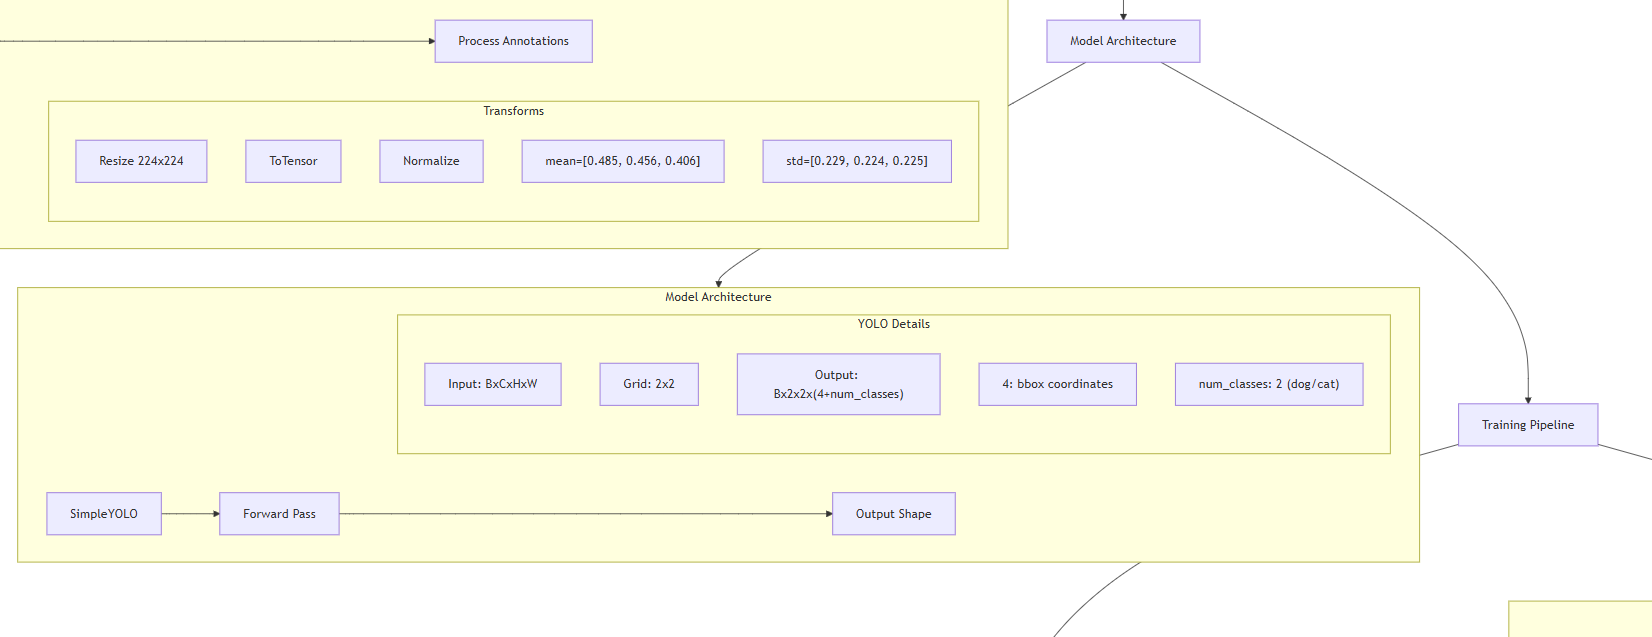

In [ ]:
class SimpleYOLO(nn.Module):
    def __init__(self, num_classes):
        super(SimpleYOLO, self).__init__()
        self.backbone = models.resnet50(weights=ResNet50_Weights.DEFAULT)
        self.num_classes = num_classes

        # Remove the final classification layer of ResNet
        self.backbone = nn.Sequential(*list(self.backbone.children())[:-2])

        # Add the YOLO head
        self.fcs = nn.Linear(
            2048, 2 * 2 * (4 + self.num_classes)
        )  # 2 is for the number of grid cell

    def forward(self, x):
        # x shape: (B, C, H, W) == (B=8,3,224,224) -->> B = batch_size = 8

        features = self.backbone(x)             # backbone(x) = (B=8,2048,7,7)
        features = F.adaptive_avg_pool2d(features, (1, 1)) # a_pool2d(x) = (B,2048,1,1)

        # B = features.size(0) = 8
        features = features.view(features.size(0), -1)  # view(x) = (B, 2048*1*1)
        features = self.fcs(features)

        return features


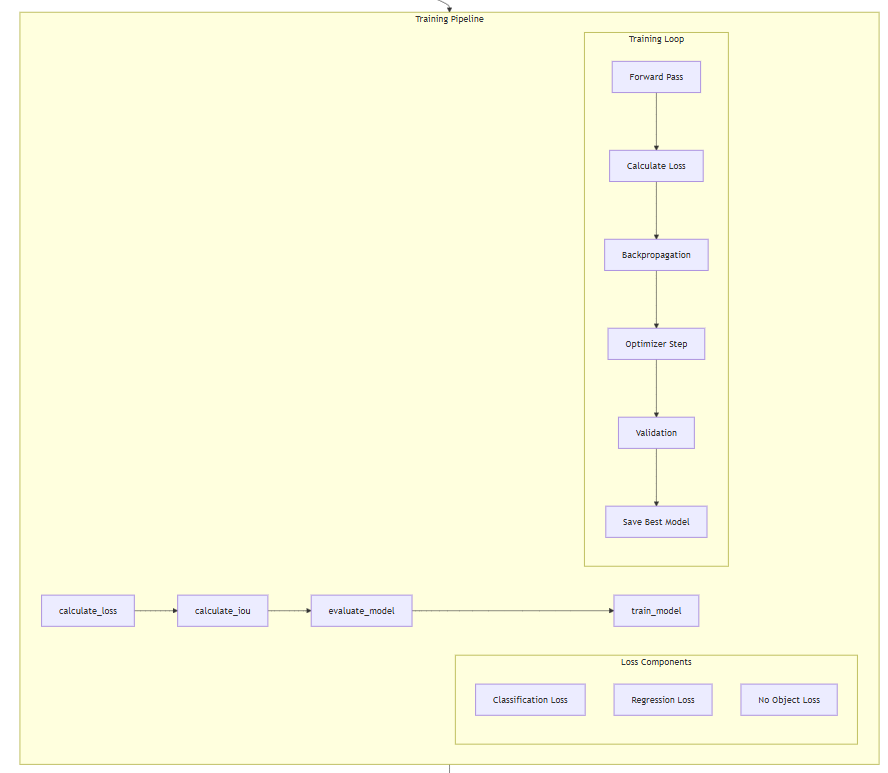

In [ ]:
def calculate_loss(output, targets, device, num_classes):
    """
    Input:
        - output: torch.Tensor(batch_size, 2, 2, 4 + num_classes)
            -> batch_size: Số lượng ảnh trong một batch.
            -> 2, 2 :  Kích thước grid  (mô hình chia ảnh thành grid 2x2).
            -> 4: Số giá trị bbbox (xmin, ymin, xmax, ymax), normalize về [0, 1]
            -> num_classes: Số lượng classes là 2: chó và mèo
            -> Ý nghĩa: Chứa các dự đoán của mô hình cho mỗi grid cell trong mỗi ảnh của batch
        - targets: list[ảnh trong batch]
            mỗi ảnh of batch = torch.tensor(num_objects_in_image, 5)>
            -> num_objects_in_image: Số lượng object (chó hoặc mèo) trong ảnh đó
            -> 5: là torch.tensor(xmin, ymin, xmax, ymax, label)
                trong đó (xmin, ymin, xmax, ymax) là bbox ground truth size, đã norm [0, 1]
                                           ,label là class label obj (0 cho 'cat', 1 cho 'dog').
            -> Ý nghĩa: ground truth về bbboxes và class_labels cho các objects
        - num_classes: int = 2 (chó, mèo); số class tối đa trong ảnh
            -> Ý nghĩa: Số classes mà mô hình phân loại (bài này là 2: chó và mèo).

    Output: torch.Tensor =  = total_loss / batch_size
        -> Total Loss (float):  L_{total} = \frac{1}{batch\_size} \sum_{batch} ( \sum_{grid\_cells\_with\_obj} (L_{class} + L_{reg}) + \sum_{grid\_cells\_without\_obj} L_{no\_obj} )
        -> Ý nghĩa: Giá trị loss trung bình trên batch
    """
    # 1. Khởi tạo loss functions
    mse_loss = nn.MSELoss()         # shape: MSELoss module
    ce_loss = nn.CrossEntropyLoss()

    batch_size = output.shape[0]
    total_loss = 0

    # 2. Lặp qua từng ảnh trong batch
    for i in range(batch_size):  # Iterate through each image in the batch
        grid_have_object = torch.zeros((batch_size, 2, 2), device=device) # mỗi ảnh có (2x2) số grid-cell

        for j in range(len(targets[i])):  # Iterate through objs in image targets[i] -> tại obj thứ [j] trong targets[i] (ảnh thứ i)
            # targets: list<torch.tensor(num_objects_in_image, 5)> , biết là 4 size của  (xmin, ymin, xmax, ymax, label)

            # Grid cell chứa obj's center, with bbox(xmin, ymin, xmax, ymax)/img_height+width -> [0, 1] normalized
            #      -> targets[i][j] = target[ảnh i trong batch, object thứ j] = .tensor(xmin, ymin, xmax, ymax, label)
            bbox_j  = targets[i][j][:4] # (xmin, ymin, xmax, ymax)
            label_j = targets[i][j][4]  # label

            # (bbox_center_x, bbox_center_y) = tọa độ trung tâm của bbox, đã normalize về [0, 1].
            # Công thức:
            #           bbox_center_x = center_x_pixel / width_image  = 224 ≈ 0.446 thuộc [0, 1]
            #           bbox_center_y = center_y_pixel / height_image = 224 ≈ 0.491 thuộc [0, 1]
            bbox_center_x = (bbox_j[0] + bbox_j[2]) / 2 # (xmin +  xmax) / 2,  của ảnh thứ i (targets[i]) trong batch
            bbox_center_y = (bbox_j[1] + bbox_j[3]) / 2 # (ymin +  ymax) / 2,

            # Ánh xạ (bbox_center_x, bbox_center_y) = 2* (bbox_center_x, bbox_center_y) = chia ảnh thành 2 phần
            grid_x = int(bbox_center_x * 2) #   int(2*(img_height, img_width)) = int([0,2), [0,2)) = ({0,1}, {0,1}) chia thành k=2 phần
            grid_y = int(bbox_center_y * 2) #  grid_x = {0,1} ; grid_y= {0,1}

            grid_have_object[i, grid_y, grid_x] = 1

            # a. Classification Loss for the responsible grid cell -> Convert label  =  one-hot encoding only for this example
            label_one_hot = torch.zeros(num_classes, device=device)
            label_one_hot[int(label_j)] = 1 # targets[i][j][4]

            # Classification loss (CrossEntropyLoss) -> output = (batch_size, 2, 2, 4(bbox) + num_classes)
            #    -> output[i, grid_y, grid_x] = [Ảnh i; Grid cell tọa độ  (grid_y, grid_x)] = obj_dự_đoán .tensor(4_bbox + num_classes)
            classification_loss = ce_loss(output[i, grid_y, grid_x, 4:], label_one_hot)

            # b. Regression Loss for the responsible grid cell
            bbox_target = bbox_j.to(device) # targets[i][j][:4]
            regression_loss = mse_loss(output[i, grid_y, grid_x, :4], bbox_target)

            # import pdb; pdb.set_trace()
            total_loss += classification_loss + regression_loss

        # c. No Object Loss (for other grid cells)
        #  "phạt" dự đoán sai ở những grid cells không chứa object
        #     "phạt" phiên bản YOLO đơn giản nên chỉ tọa độ bounding box bị phạt, còn class label thì không bị phạt trực tiếp
        #     "phạt" phiên bản YOLO đầy đủ phức tạp hơn, No Object Loss thường bao gồm cả việc phạt "objectness score" (độ tin cậy grid cell chứa object)

        no_obj_loss = 0 # Khởi tạo no_obj_loss = 0. Loss này sẽ được tích lũy từ các grid cells không chứa object
        for other_grid_y in range(2): # Lặp qua tất cả các hàng của grid (0 và 1 trong grid 2x2)
            for other_grid_x in range(2): # Lặp qua tất cả các cột của grid (0 và 1 trong grid 2x2)
                if grid_have_object[i, other_grid_y, other_grid_x] == 0: # Kiểm tra xem grid cell (other_grid_y, other_grid_x) có chứa object hay không.
                                                                            # grid_have_object[i, other_grid_y, other_grid_x] = 1 nếu chứa object (được gán ở phần trước), = 0 nếu không chứa.
                    # MSE loss for predicting no object (all zeros)
                    no_obj_loss += mse_loss( # Tính MSELoss và cộng dồn vào no_obj_loss
                        output[i, other_grid_y, other_grid_x, :4], # Bounding box coordinates dự đoán cho grid cell (other_grid_y, other_grid_x)
                        torch.zeros(4, device=device), # Target là tensor zeros shape (4,), biểu thị "không có object" (bounding box lý tưởng là [0, 0, 0, 0] trong không gian normalize)
                    )

        total_loss += no_obj_loss

    return total_loss / batch_size  # Average loss over the batch


def calculate_iou(box1, box2):
    # Calculate intersection coordinates
    x_a = max(box1[0], box2[0])
    y_a = max(box1[1], box2[1])
    x_b = min(box1[2], box2[2])
    y_b = min(box1[3], box2[3])

    # Compute the area of intersection
    inter_area = max(0, x_b - x_a) * max(0, y_b - y_a)

    # Compute the area of both the prediction and ground-truth
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Compute the IoU
    iou = inter_area / float(box1_area + box2_area - inter_area)

    return iou

def evaluate_model(model, data_loader, device, num_classes):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for images, targets in tqdm.tqdm(data_loader, desc="Validation", leave=False):
            images = images.to(device, non_blocking=True)

            output = model(images)

            # Reshape output to (batch_size, grid_y, grid_x, 4 + num_classes)
            output = output.view(images.shape[0], 2, 2, 4 + num_classes)

            total_loss = calculate_loss(output, targets, device, num_classes)
            running_loss += total_loss.item()

            # Convert predictions and targets to the format required by MeanAveragePrecision
            for batch_idx in range(images.shape[0]):
                preds = []
                targs = []

                # Process ground truth targets
                for target in targets[batch_idx]:
                    targs.append(
                        {
                            "boxes": target[:4].unsqueeze(0),
                            "labels": target[4]
                            .unsqueeze(0)
                            .long(),  # Convert label to Long
                        }
                    )

                # Match predictions to ground truth targets based on highest IoU
                # Iterate through targets first to find the best matching prediction for each target
                for target_idx, target in enumerate(targets[batch_idx]):
                    best_iou = -1
                    best_pred_idx = -1

                    for grid_y in range(2):
                        for grid_x in range(2):
                            # Extract predicted bounding box
                            bbox_pred = output[batch_idx, grid_y, grid_x, :4]

                            # Skip predictions where bbox is approximately [0, 0, 0, 0]
                            if torch.all(torch.round(bbox_pred, decimals=2) == 0):
                                continue

                            # Calculate IoU with the current target
                            iou = calculate_iou(bbox_pred, target[:4])

                            # If this prediction has higher IoU than current best, update
                            if iou > best_iou:
                                best_iou = iou
                                best_pred_idx = (grid_y, grid_x)

                    # If a best match is found for this target, add the prediction
                    if best_pred_idx != -1:
                        grid_y, grid_x = best_pred_idx
                        bbox_pred = output[batch_idx, grid_y, grid_x, :4]
                        class_probs = torch.softmax(
                            output[batch_idx, grid_y, grid_x, 4:], dim=0
                        )
                        class_pred = class_probs.argmax().item()
                        confidence = class_probs[class_pred].item()

                        preds.append(
                            {
                                "boxes": bbox_pred.unsqueeze(0),
                                "scores": torch.tensor([confidence], device=device),
                                "labels": torch.tensor([class_pred], device=device),
                            }
                        )

                # Add current batch predictions and targets to the overall lists
                if preds:  # Only add to all_preds if there are any valid predictions
                    all_preds.append(
                        {
                            k: v.to(device) if isinstance(v, torch.Tensor) else v
                            for k, v in preds[0].items()
                        }
                    )

                if targs:
                    all_targets.append(
                        {
                            k: v.to(device) if isinstance(v, torch.Tensor) else v
                            for k, v in targs[0].items()
                        }
                    )

    val_loss = running_loss / len(data_loader)

    # Calculate mAP
    metric = MeanAveragePrecision()
    metric.update(all_preds, all_targets)
    mAP_dict = metric.compute()

    return val_loss, mAP_dict["map"]


In [ ]:
def train_model( model, train_loader, val_loader, optimizer,
                num_epochs, device, num_classes):
    best_val_map = 0.0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in tqdm.tqdm(range(num_epochs), desc="Epochs"):
        model.train()
        running_loss = 0.0

        for images, targets in tqdm.tqdm(train_loader, desc="Batches", leave=False):
            batch_size = images.shape[0]
            images = images.to(device, non_blocking=True)

            optimizer.zero_grad()
            output = model(images)

            output = output.view(batch_size, 2, 2, 4 + num_classes)
            total_loss = calculate_loss(output, targets, device, num_classes)

            total_loss.backward()
            optimizer.step()
            running_loss += total_loss.item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)

        # Validation
        val_loss, val_map = evaluate_model(model, val_loader, device, num_classes)
        val_losses.append(val_loss)
        val_accuracies.append(val_map)

        print(
            f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation mAP: {val_map:.4f}"
        )

        # Save the best model
        if val_map > best_val_map:
            best_val_map = val_map
            torch.save(model.state_dict(), "best_model.pth")

    return train_losses, val_losses, train_accuracies, val_accuracies


In [ ]:

# Initialize model, criterion, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 2  # Assuming two classes: dog and cat
class_to_idx = {"dog": 0, "cat": 1}

model = SimpleYOLO(num_classes=num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-3)

# Train the model
num_epochs = 12
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, optimizer, num_epochs, device, num_classes
)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 169MB/s] 


Epochs:   0%|          | 0/12 [00:00<?, ?it/s]

Batches:   0%|          | 0/46 [00:00<?, ?it/s]

Validation:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 1/12, Train Loss: 0.8190, Validation Loss: 3.7228, Validation mAP: 0.0005


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

Validation:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 2/12, Train Loss: 0.3860, Validation Loss: 1.7608, Validation mAP: 0.0119


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

Validation:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 3/12, Train Loss: 0.2751, Validation Loss: 0.7325, Validation mAP: 0.0073


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

Validation:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 4/12, Train Loss: 0.2150, Validation Loss: 0.5313, Validation mAP: 0.0340


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

Validation:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 5/12, Train Loss: 0.1934, Validation Loss: 0.5020, Validation mAP: 0.0123


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

Validation:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 6/12, Train Loss: 0.1822, Validation Loss: 0.8854, Validation mAP: 0.0305


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

Validation:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 7/12, Train Loss: 0.1509, Validation Loss: 0.6867, Validation mAP: 0.0193


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

Validation:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 8/12, Train Loss: 0.1310, Validation Loss: 0.3870, Validation mAP: 0.0276


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

Validation:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 9/12, Train Loss: 0.1071, Validation Loss: 0.2634, Validation mAP: 0.0798


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

Validation:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 10/12, Train Loss: 0.0915, Validation Loss: 0.4848, Validation mAP: 0.0686


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

Validation:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 11/12, Train Loss: 0.0944, Validation Loss: 0.4532, Validation mAP: 0.0740


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

Validation:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 12/12, Train Loss: 0.1264, Validation Loss: 0.4550, Validation mAP: 0.0521


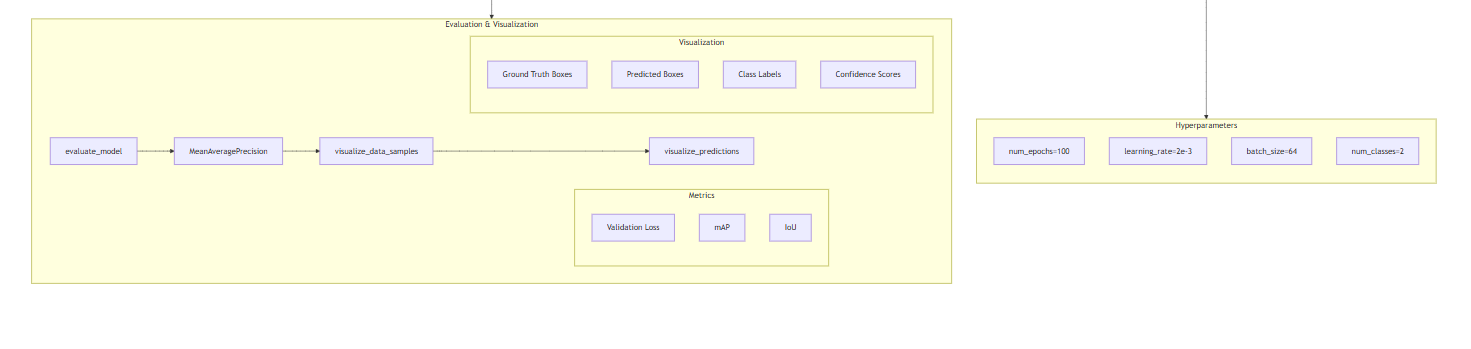

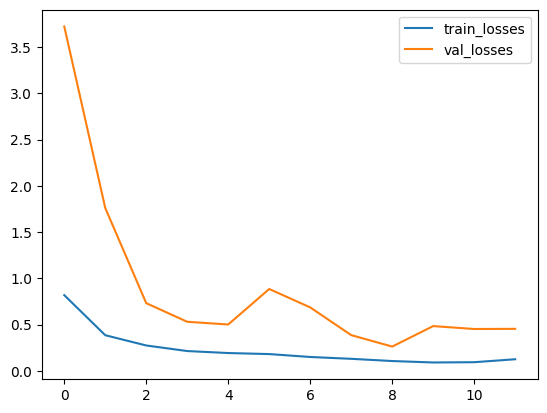

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(val_losses,   label='val_losses')
plt.legend()

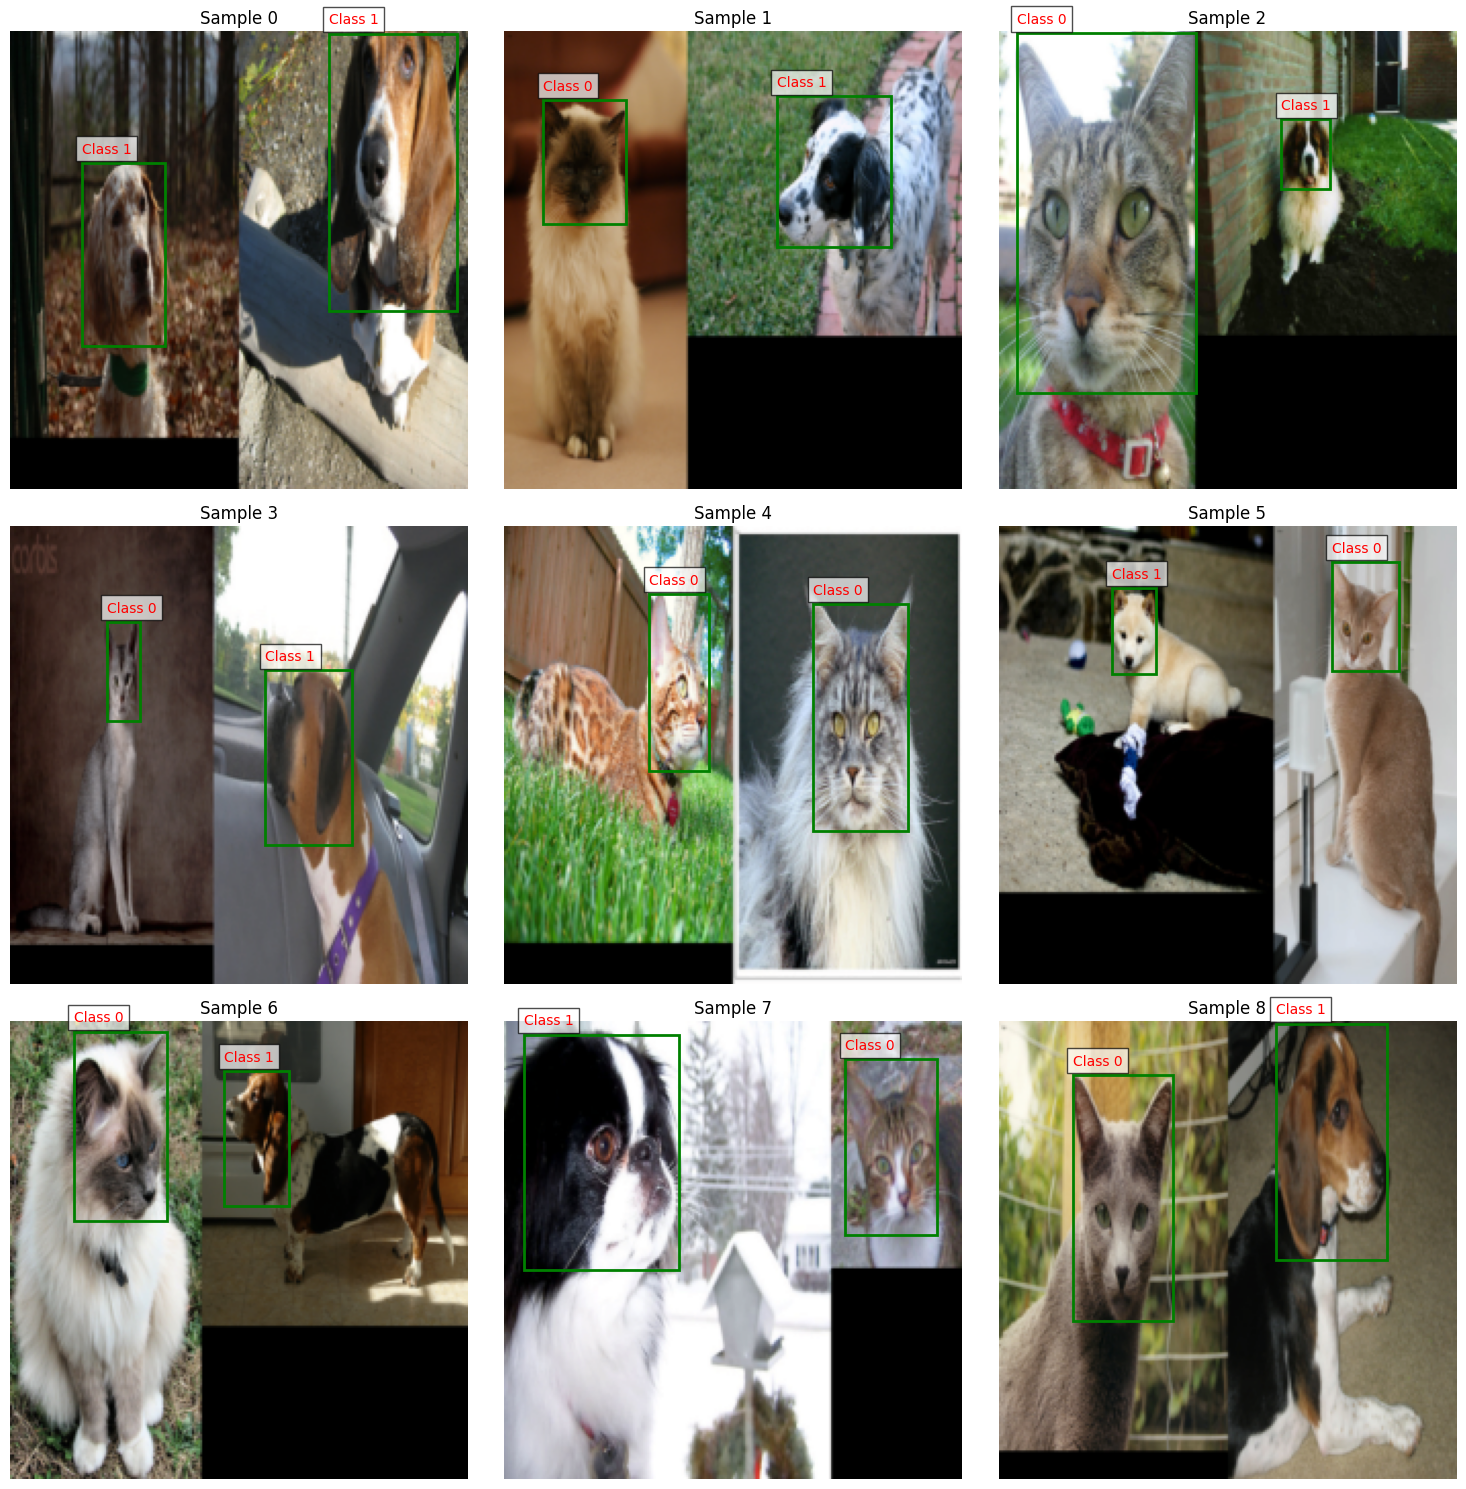

In [ ]:
def visualize_data_samples(dataset, num_rows=3, num_cols=3, start_idx=0, class_to_idx=None):
    """
    Visualize samples from dataset with bounding boxes and labels

    Args:
        dataset: Dataset to visualize
        num_rows: Number of rows in grid
        num_cols: Number of columns in grid
        start_idx: Starting index in dataset
        class_to_idx: Dictionary mapping class names to indices
    """
    # Add denormalization transform
    denorm = transforms.Compose([
        transforms.Normalize(
            mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
            std=[1/0.229, 1/0.224, 1/0.225]
        )
    ])

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    axes = axes.flatten()

    for idx, ax in enumerate(axes):
        merged_image, annotations = dataset[start_idx + idx]

        # Denormalize the image before converting to PIL
        if isinstance(merged_image, torch.Tensor):
            merged_image = denorm(merged_image)
            # Clamp values to [0,1] range
            merged_image = torch.clamp(merged_image, 0, 1)
            image = transforms.ToPILImage()(merged_image)
        else:
            image = merged_image

        ax.imshow(image)

        # Draw each bounding box on the image
        for ann in annotations:
            bbox = ann[:4]
            label = int(ann[4].item())

            # Scale bounding box coordinates to image size
            width, height = image.size
            x_min = bbox[0] * width
            y_min = bbox[1] * height
            x_max = bbox[2] * width
            y_max = bbox[3] * height

            # Create a rectangle patch
            rect = patches.Rectangle(
                (x_min, y_min),
                x_max - x_min,
                y_max - y_min,
                linewidth=2,
                edgecolor="g",
                facecolor="none",
            )
            ax.add_patch(rect)

            # Add label text if class_to_idx is provided
            if class_to_idx:
                label_name = class_to_idx.get(label, f"Class {label}")
                ax.text(
                    x_min,
                    y_min - 5,
                    label_name,
                    color="r",
                    fontsize=10,
                    bbox=dict(facecolor="white", alpha=0.7),
                )

        ax.set_title(f"Sample {start_idx + idx}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Plot first grid (images 0-8)
visualize_data_samples(val_dataset, start_idx=0, class_to_idx=class_to_idx)


In [ ]:
# features có hình dạng     [64, 3, 224, 224]
# features.contiguous() --> 64*3*224*224

# features.reshape(features.size(0), -1)              --> [64,    3*224*224]
# features.view(features.size(0), -1)                 --> [64,    3*224*224]
# features.contiguous().view(features.size(0), -1)    --> [64,    3*224*224]
# features.view(64,3,-1)                              --> [64, 3,   224*224]